In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [4]:
transform=transforms.ToTensor()

In [5]:
from google.colab import drive

In [6]:
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [10]:
!ls "/content/gdrive/MyDrive/Colab Notebooks/Pytorch-Lightning Udemy/"

 AI-IN-MEDICAL-MATERIALS_NEW   MNST.ipynb   numpy.ipynb  'torch basics.ipynb'


In [11]:
train_data=datasets.MNIST(root='/content/gdrive/MyDrive/Colab Notebooks/Pytorch-Lightning Udemy/data',train=True,download=True,transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 137081011.58it/s]

Extracting /content/gdrive/MyDrive/Colab Notebooks/Pytorch-Lightning Udemy/data/MNIST/raw/train-images-idx3-ubyte.gz to /content/gdrive/MyDrive/Colab Notebooks/Pytorch-Lightning Udemy/data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 29873167.40it/s]


Extracting /content/gdrive/MyDrive/Colab Notebooks/Pytorch-Lightning Udemy/data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/gdrive/MyDrive/Colab Notebooks/Pytorch-Lightning Udemy/data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 96884291.73it/s]

Extracting /content/gdrive/MyDrive/Colab Notebooks/Pytorch-Lightning Udemy/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/gdrive/MyDrive/Colab Notebooks/Pytorch-Lightning Udemy/data/MNIST/raw

100%|██████████| 4542/4542 [00:00<00:00, 13030457.43it/s]

Extracting /content/gdrive/MyDrive/Colab Notebooks/Pytorch-Lightning Udemy/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/gdrive/MyDrive/Colab Notebooks/Pytorch-Lightning Udemy/data/MNIST/raw



In [12]:
test_data=datasets.MNIST(root='/content/gdrive/MyDrive/Colab Notebooks/Pytorch-Lightning Udemy/data',train=False,download=True,transform=transform)

In [13]:
train_data


Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/gdrive/MyDrive/Colab Notebooks/Pytorch-Lightning Udemy/data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [14]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /content/gdrive/MyDrive/Colab Notebooks/Pytorch-Lightning Udemy/data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [15]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [16]:
type(train_data[0])

tuple

In [18]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [19]:
image,label=train_data[0]

In [20]:
image.shape

torch.Size([1, 28, 28])

In [21]:
label

5

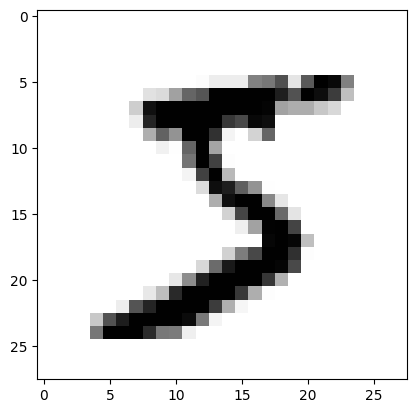

In [23]:
plt.imshow(image.reshape((28,28)),cmap='gist_yarg')

In [24]:
torch.manual_seed(101)

train_loader=DataLoader(train_data,batch_size=100,shuffle=True)
test_loader=DataLoader(test_data,batch_size=100,shuffle=True)

In [25]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x:f'{x:4}'))

In [26]:
#First batch
for images,labels in train_loader:
  break

In [27]:
images.shape

torch.Size([100, 1, 28, 28])

In [28]:
print('Labels:',labels[:12].numpy())

Labels: [   7    2    3    5    8    5    3    6    9    9    1    3]


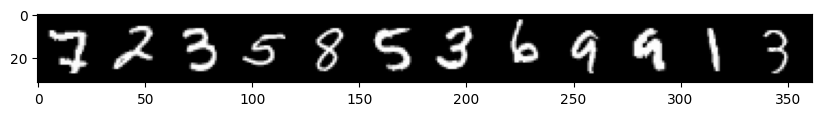

In [29]:
im=make_grid(images[:12],nrow=12)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

In [37]:
class MultilayerPerceptron(nn.Module):
  def __init__(self,in_sz=784,out_sz=10,layers=[120,84]):
    super().__init__()
    self.fc1=nn.Linear(in_sz,layers[0])
    self.fc2=nn.Linear(layers[0],layers[1])
    self.fc3=nn.Linear(layers[1],out_sz)

  def forward(self,X):
    X=F.relu(self.fc1(X))
    X=F.relu(self.fc2(X))
    X=self.fc3(X)

    return F.log_softmax(X,dim=1)


In [38]:
torch.manual_seed(81)
model=MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [39]:
for param in model.parameters():
  print(param.numel())

94080
120
10080
84
840
10


In [40]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [45]:
images.shape

torch.Size([100, 1, 28, 28])

In [47]:
images.view(100,-1).shape

torch.Size([100, 784])

In [48]:
import time

In [49]:
start_time=time.time()

In [ ]:
epochs=10

train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]

for i in range(epochs):
  trn_corr=0
  tst_corr=0

  for b,(X_train,y_train) in enumerate(train_loader):
    b+=1

    y_pred=model(X_train.view(100,-1))
    loss=criterion(y_pred,y_train)

    predicted=torch.max(y_pred.data,1)[1]
    batch_corr=(predicted==y_train).sum()
    trn_corr+=batch_corr

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if b % 200 == 0:
      acc=trn_corr.item()*100/(100*b)
      print(f'Epoch {i} batch {b} loss:{loss.item()} accuracy:{acc}')
    train_losses.append(loss)
    train_correct.append(trn_corr)

    with torch.no_grad():
      for b,(X_test,y_test) in enumerate(test_loader):
        y_val=model(X_test.view(-1,784))
        predicted=torch.max(y_val.data,1)[1]
        tst_corr+=(predicted == y_test).sum()
    loss=criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)




total_time=time.time()-start_time
print(f'Duration:{total_time/60} mins')

Epoch 0 batch 200 loss:0.08712486177682877 accuracy:96.355
Epoch 0 batch 400 loss:0.07205376029014587 accuracy:96.39
Epoch 0 batch 600 loss:0.04179840162396431 accuracy:96.405
Epoch 1 batch 200 loss:0.01756850816309452 accuracy:97.41
Epoch 1 batch 400 loss:0.12803912162780762 accuracy:97.3075
Epoch 1 batch 600 loss:0.04171029105782509 accuracy:97.30166666666666
Epoch 2 batch 200 loss:0.11504468321800232 accuracy:97.755
Epoch 2 batch 400 loss:0.04246867075562477 accuracy:97.775
Epoch 2 batch 600 loss:0.05393631383776665 accuracy:97.765
Epoch 3 batch 200 loss:0.10486548393964767 accuracy:98.515
Epoch 3 batch 400 loss:0.036108218133449554 accuracy:98.3275
Epoch 3 batch 600 loss:0.04308129847049713 accuracy:98.25333333333333
Epoch 4 batch 200 loss:0.04999024420976639 accuracy:98.66
Epoch 4 batch 400 loss:0.05648035183548927 accuracy:98.5825
Epoch 4 batch 600 loss:0.02554209716618061 accuracy:98.55333333333333
Epoch 5 batch 200 loss:0.043326135724782944 accuracy:98.82
Epoch 5 batch 400 loss

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

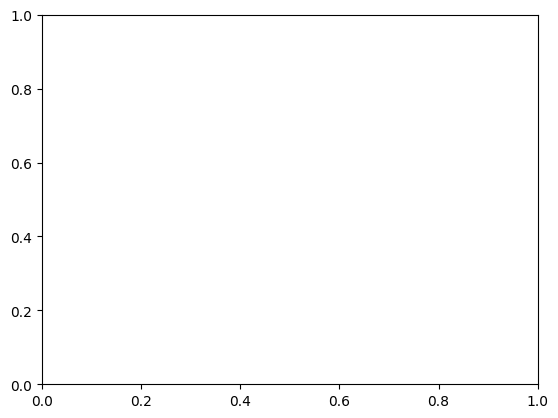

In [54]:
plt.plot(train_losses,label='training_loss')
plt.plot(test_losses,label='Test loss')

In [ ]:
train_acc=[t/600 for t in train_correct]


In [ ]:
train_acc

In [ ]:
test_acc=[t/100 for t in test_correct]

In [ ]:
test_acc

In [ ]:
plt.plot(train_acc,label='train_acc')
plt.plot(test_acc,label='test_acc')
plt.legend()

In [ ]:
test_load_all=DataLoader(test_data,batch_size=10000,shuffle=False)

In [ ]:
with torch.no_grad():
  correct=0

  for X_test,y_test in test_load_all:
    y_val=model(X__test.view(len(X_test),-1))
    predicted=torch.max(y_val,1)[1]
    correct+=(predicted == y_test).sum()

In [ ]:
correct

In [ ]:
100*correct.item()/len(test_data)

In [ ]:
confusion_matrix(predicted.view(-1),y_test.view(-1))